# Credit Risk Analysis of A SACCO
## Introduction 
    Credit risk is the likelihood of loss from debtor’s failing to remit payments on any type of debt. It is the most costly risk for financial institutions and for organizations such as Savings and Credit Societies poses a greater risk of loss of member deposits. Credit risk evaluation, therefore, is the process of mitigating losses by understanding the adequacy of both a financial institutions’ capital and loan loss reserves at any given time.
    The aim of this project is to ascetain first the type of loan that is at a risk of default as well as predict future possibilities of loss from that loan account. 
### The origin of the data set
    The dataset used is from a SACCO society in Kenya, (For the purposes of confidentiality the name shall be witheld.) It was obtained in the line of audit and is referred to as the loan statement.
## objectives 
1. To ascertain the most defaulted loan type
2. To establish a prediction model for loan default
3. To recommend a system of better credit analysis
d. The limitations of the research endevour

# Preliminary Data Exploration and Splitting

In [ ]:
#Importing libraries
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency



In [ ]:
#Loading my data set
loans= pd.read_csv('https://raw.githubusercontent.com/Salz3/DATA/main/Loanlistings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# This line states all the columns in my data set
loans.columns

Index(['BranchID', 'Client ID', 'Loan Series', 'Application ID', 'Product ID',
       'Product Name', 'Classification', 'Amount Financed',
       'Installment Amount', 'Frequency', 'Term', 'Outstanding Balance',
       'Arrears Amount', 'Arrears Days', 'Interest Rate', 'Net Asset Value',
       'Interest Suspense', 'Penalty Suspended', 'Interest Receivable',
       'Penalty Receivable', 'Total Prov And Int Susp', 'Purpose Description',
       'Closed Date', 'Date Disbursed', 'Last Credit Date', 'Maturity Date',
       'Repayment Account Balance', 'Investa Balance',
       'Installment Start Date', 'Calculation Method ID', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [ ]:
#This gives the first rows in my data set
loans.head ()

,BranchID,Client ID,Loan Series,Application ID,Product ID,Product Name,Classification,Amount Financed,Installment Amount,Frequency,Term,Outstanding Balance,Arrears Amount,Arrears Days,Interest Rate,Net Asset Value,Interest Suspense,Penalty Suspended,Interest Receivable,Penalty Receivable,Total Prov And Int Susp,Purpose Description,Closed Date,Date Disbursed,Last Credit Date,Maturity Date,Repayment Account Balance,Investa Balance,Installment Start Date,Calculation Method ID,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,1.0,10057.0,24.0,13820.0,AMKL,CASH LOAN,NORMAL,"36,300.00","38,478.00",Monthly,1.0,"-38,478.00",0,0,6.0,"3,000,000.00",0,0,"2,107.74",0,384.78,AgriBusiness,NaN,01/09/2021,01/09/2021,01/10/2021,"6,275.04","87,650.00",01/10/2021,FN,NaN,NaN,NaN
1,1.0,15209.0,35.0,14000.0,AMKL,CASH LOAN,NORMAL,"25,000.00","26,500.00",Monthly,1.0,"-26,500.00",0,0,6.0,"650,000.00",0,0,290.32,0,265,AgriBusiness,NaN,25/09/2021,24/09/2021,25/10/2021,"7,198.48","86,666.37",25/10/2021,FN,NaN,NaN,NaN
2,1.0,8874.0,47.0,13997.0,AMKL,CASH LOAN,NORMAL,"35,000.00","37,100.00",Monthly,1.0,"-37,100.00",0,0,6.0,0,0,0,406.45,0,371,AgriBusiness,NaN,25/09/2021,24/09/2021,25/10/2021,44.96,"125,487.14",25/10/2021,FN,NaN,NaN,NaN
3,1.0,239816.0,31.0,13770.0,AMKL,CASH LOAN,WATCH,"34,461.00","36,529.00",Monthly,1.0,"-36,517.92","36,604.92",5,6.0,"790,000.00",0,0,"2,056.92",87,"1,825.90",AgriBusiness,NaN,27/08/2021,25/09/2021,27/09/2021,0,"81,113.00",26/09/2021,FN,NaN,NaN,NaN
4,1.0,254587.0,6.0,13851.0,AMKL,CASH LOAN,NORMAL,"24,000.00","25,440.00",Monthly,1.0,"-25,440.00",0,0,6.0,0,0,0,"1,161.29",0,254.4,AgriBusiness,NaN,06/09/2021,27/12/2018,06/10/2021,12.15,"49,000.00",06/10/2021,FN,NaN,NaN,NaN


In [ ]:
#This gives the last 5 rows in my data set
loans.tail ()

,BranchID,Client ID,Account ID,Loan Series,Application ID,Product ID,Product Name,Account Name,Classification,Amount Financed,...,Investa Balance,Installment Start Date,Credit Officer Name,Calculation Method ID,Identification ID,Mobile Number,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
20759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Page : 1 / 1,NaN
20763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# This line of code transposes my data 
loans.head().T

,0,1,2,3,4
BranchID,1.0,1.0,1.0,1.0,1.0
Client ID,10057.0,15209.0,8874.0,239816.0,254587.0
Account ID,1212000000000.0,1212000000000.0,1212000000000.0,1212000000000.0,1212000000000.0
Loan Series,24.0,35.0,47.0,31.0,6.0
Application ID,13820.0,14000.0,13997.0,13770.0,13851.0
Product ID,AMKL,AMKL,AMKL,AMKL,AMKL
Product Name,AMICASH LOAN,AMICASH LOAN,AMICASH LOAN,AMICASH LOAN,AMICASH LOAN
Classification,NORMAL,NORMAL,NORMAL,WATCH,NORMAL
Amount Financed,"36,300.00","25,000.00","35,000.00","34,461.00","24,000.00"
Installment Amount,"38,478.00","26,500.00","37,100.00","36,529.00","25,440.00"


In [ ]:
#What are the data types in the data sets
loans.dtypes

BranchID                     float64
Client ID                    float64
Loan Series                  float64
Application ID               float64
Product ID                    object
Product Name                  object
Classification                object
Amount Financed               object
Installment Amount            object
Frequency                     object
Term                         float64
Outstanding Balance           object
Arrears Amount                object
Arrears Days                  object
Interest Rate                float64
Net Asset Value               object
Interest Suspense             object
Penalty Suspended             object
Interest Receivable           object
Penalty Receivable            object
Total Prov And Int Susp       object
Purpose Description           object
Closed Date                   object
Date Disbursed                object
Last Credit Date              object
Maturity Date                 object
Repayment Account Balance     object
I

In [ ]:
#How many columns are in the dataset Loans
len(loans.columns)

33

In [ ]:
#Finding the number of unique entries in the type of the loan taken
loans['Product Name'].unique()
len(loans['Product Name'].unique())

61

In [ ]:
#Finding the number of unique entries in the type of the loan taken
loans['Purpose Description'].unique()
#len(loans['Purpose Description'].unique())

array(['AgriBusiness', nan, 'Trade', 'Land and Housing',
       'Consumption and Social Activities',
       'Finance Investment & Insurance', 'Crop Farming',
       'Agriculture Supporting Services', 'Animal Production'],
      dtype=object)

In [ ]:
#Considering that the data types are mostly objects then it I looked at the number of missing values per column 
loans.isna()

,BranchID,Client ID,Loan Series,Application ID,Product ID,Product Name,Classification,Amount Financed,Installment Amount,Frequency,Term,Outstanding Balance,Arrears Amount,Arrears Days,Interest Rate,Net Asset Value,Interest Suspense,Penalty Suspended,Interest Receivable,Penalty Receivable,Total Prov And Int Susp,Purpose Description,Closed Date,Date Disbursed,Last Credit Date,Maturity Date,Repayment Account Balance,Investa Balance,Installment Start Date,Calculation Method ID,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20754,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
20755,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
20756,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
20757,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
loans.isna().sum

<bound method DataFrame.sum of        BranchID  Client ID  Loan Series  ...  Unnamed: 30  Unnamed: 31  Unnamed: 32
0         False      False        False  ...         True         True         True
1         False      False        False  ...         True         True         True
2         False      False        False  ...         True         True         True
3         False      False        False  ...         True         True         True
4         False      False        False  ...         True         True         True
...         ...        ...          ...  ...          ...          ...          ...
20754      True       True         True  ...         True         True         True
20755      True       True         True  ...         True         True         True
20756      True       True         True  ...         True         True         True
20757      True       True         True  ...         True         True         True
20758      True       True         True  ... 

In [ ]:
# To keep the data valid we drop the empty coumns
#x=3
y=4
loans.drop(loans.tail(y).index,
        inplace = True)


In [ ]:
for i in ['Date Disbursed','Last Credit Date','Maturity Date']:
    loans[i]=pd.to_datetime(loans[i])

In [ ]:
for i in ["Amount Financed"]:
    loans['Amount Financed']=loans[i].str.replace(',','')
loans['Amount Financed']

0             36300.00
1             25000.00
2             35000.00
3             34461.00
4             24000.00
             ...      
20750         36000.00
20751        100000.00
20752        600000.00
20753    5111412413.61
20754              NaN
Name: Amount Financed, Length: 20755, dtype: object

In [ ]:
loans["Amount Financed"]=loans["Amount Financed"].astype(float)

In [ ]:
# def change_int (column):
#   for i in loans.columns:
#     try:
#         loans[i]= loans[i].astype(float)
#     except:
#         pass 
#     return change_int
# #This changes everything to int

In [ ]:
loans['Net Asset Value']


0        3,000,000.00
1          650,000.00
2                   0
3          790,000.00
4                   0
             ...     
20750               0
20751               0
20752               0
20753             NaN
20754             NaN
Name: Net Asset Value, Length: 20755, dtype: object

In [ ]:
loans['Amount Financed'].describe()
loans['Amount Financed'].agg(['min', 'mean', 'max'])

min     0.000000e+00
mean    4.925713e+05
max     5.111412e+09
Name: Amount Financed, dtype: float64

In [ ]:
#Dropping columns that are not needed
loans=loans.drop(["BranchID","Client ID","Application ID",'Closed Date','Frequency', 'Outstanding Balance',"Interest Suspense",'Unnamed: 30','Unnamed: 31', 'Unnamed: 32','Installment Start Date','Investa Balance', 'Calculation Method ID','Penalty Receivable','Installment Amount','Penalty Suspended','Arrears Amount', 'Loan Series','Total Prov And Int Susp', 'Repayment Account Balance'],axis=1)

In [ ]:
#Reassessing the remaining columns
loans.columns

Index(['Product ID', 'Product Name', 'Classification', 'Amount Financed',
       'Term', 'Arrears Days', 'Interest Rate', 'Net Asset Value',
       'Interest Receivable', 'Purpose Description', 'Date Disbursed',
       'Last Credit Date', 'Maturity Date'],
      dtype='object')

# Plotting the Data(Graphical representation)

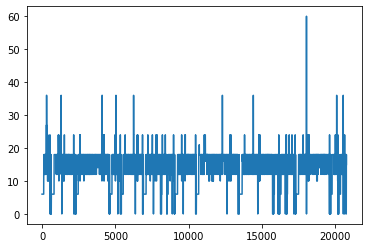

In [ ]:
loans['Interest Rate'].plot(kind='line') #Finding the amount of interest charged per amount borrowed


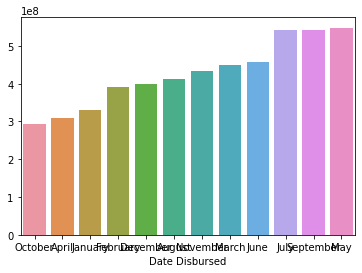

In [ ]:
# use the groupby() function to group by date 
# and apply size() function
# size() is equivalent to counting the distinct rows
grouped = loans.groupby(loans['Date Disbursed'].dt.strftime('%B'))['Amount Financed'].sum().sort_values()
 
# plot the result
# sns.barplot(x = result.index, y = result.values)
Fig= sns.barplot(x= grouped.index, y= grouped.values)
#Fig.set_dpi(800)
plt.show()

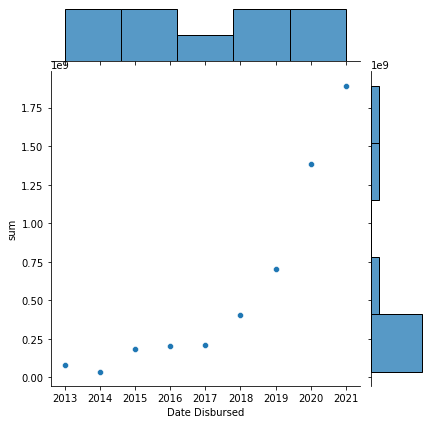

In [ ]:
loan1=loans.groupby(loans['Date Disbursed'].dt.year)['Amount Financed'].agg(['sum', 'mean', 'max'])
# loans.groupby(year('Date Disbursed')).agg({'Amount Financed': 'sum'})
Fig= sns.jointplot(data=loan1, x="Date Disbursed", y="sum")
# Fig.size= figsize=(12,10)
plt.show()

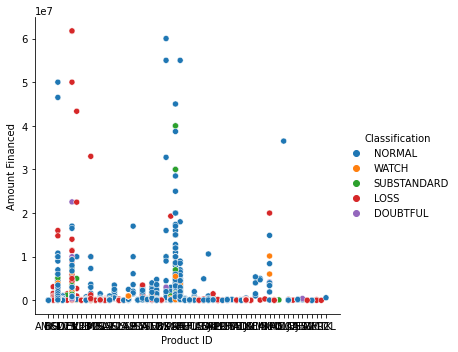

In [ ]:
import seaborn as sns
sns.relplot(x='Product ID', y='Amount Financed', data=loans, hue='Classification')
#plt.axis("off")
plt.show()

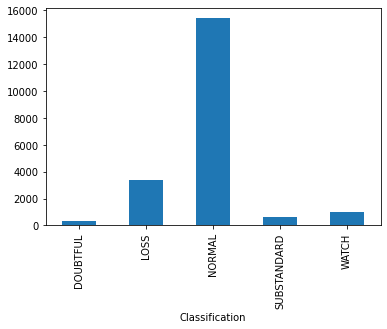

In [ ]:
#Count per category
loans.groupby(['Classification']).size().plot(kind = "bar") 

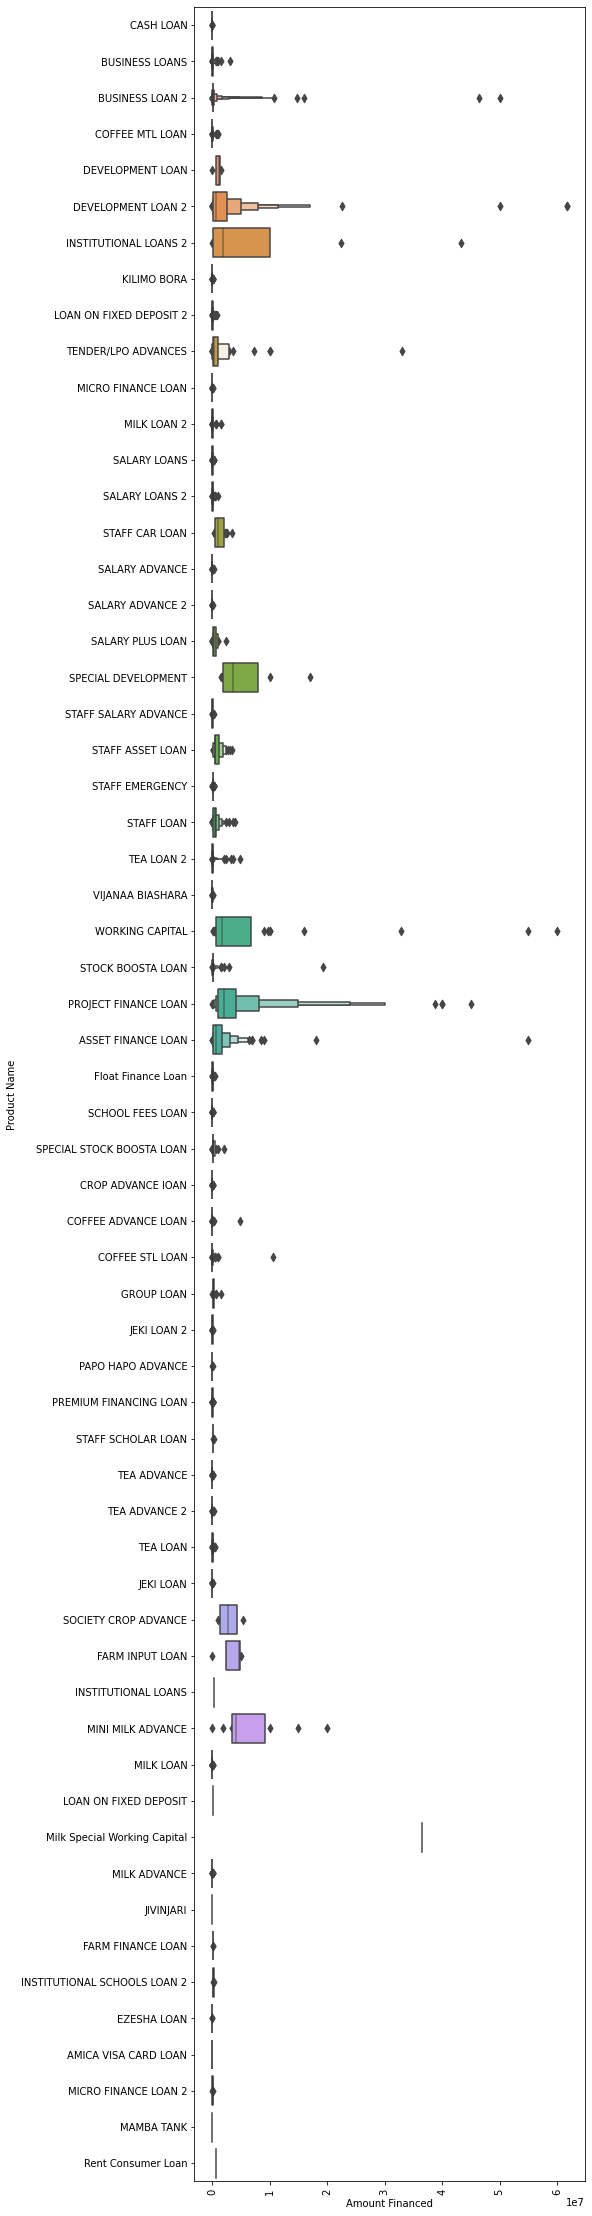

In [ ]:
fig, ax = plt.subplots(figsize=(7, 40))
ax = sns.boxenplot(x='Amount Financed', y='Product Name', data=loans)
plt.xticks(rotation=90)
plt.show()

In [ ]:
loans['Amount Financed'].agg(['min', 'mean', 'max'])

min     0.000000e+00
mean    4.925713e+05
max     5.111412e+09
Name: Amount Financed, dtype: float64

In [ ]:
for i in ["Net Asset Value"]:
    loans['Net Asset Value']=loans[i].str.replace(',','')
loans["Net Asset Value"]=loans["Net Asset Value"].astype(float)
loans['Net Asset Value'].describe()

count    2.075300e+04
mean     3.434980e+05
std      9.317506e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.212800e+09
Name: Net Asset Value, dtype: float64

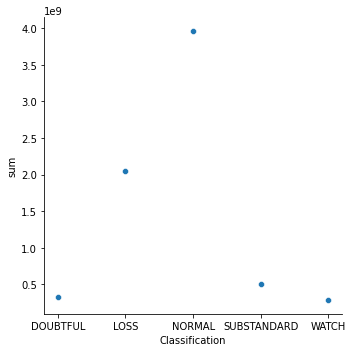

In [ ]:
#Grouping classifications by the size of net assets to find out which loan classes have the highest asset turn
loan2=loans.groupby(loans['Classification'])['Net Asset Value'].agg(['sum', 'mean', 'max'])
# loans.groupby(year('Date Disbursed')).agg({'Amount Financed': 'sum'})
Fig= sns.relplot(data=loan2, x="Classification", y="sum")
# Fig.size= figsize=(12,10)
plt.show()

In [ ]:
loans.columns

Index(['Product ID', 'Product Name', 'Classification', 'Amount Financed',
       'Term', 'Arrears Days', 'Interest Rate', 'Net Asset Value',
       'Interest Receivable', 'Purpose Description', 'Date Disbursed',
       'Last Credit Date', 'Maturity Date'],
      dtype='object')

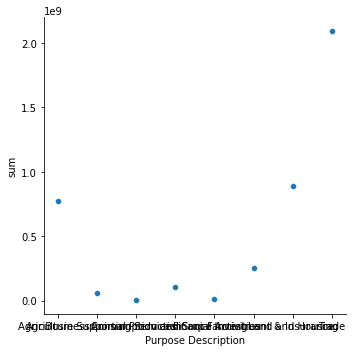

In [ ]:
#An aggregation of the security requirement per purpose
loan3=loans.groupby(loans['Purpose Description'])['Net Asset Value'].agg(['sum', 'mean', 'max'])
# loans.groupby(year('Date Disbursed')).agg({'Amount Financed': 'sum'})
ax = sns.relplot(x='Purpose Description', y="sum", data=loan3)
ax.size= figsize=(7,12)
#plt.xticks(rotation=90)
plt.show()
# import bokeh.plotting 
#from bokeh.plotting import figure, output_file, show

In [ ]:
loan3

,sum,mean,max
Purpose Description,,,
AgriBusiness,7.750192e+08,8.857363e+04,20000000.0
Agriculture Supporting Services,5.619260e+07,5.131744e+04,14000000.0
Animal Production,1.456500e+06,1.004483e+04,487500.0
Consumption and Social Activities,1.029088e+08,8.611613e+04,14000000.0
Crop Farming,9.828850e+06,5.691285e+03,4390400.0
Finance Investment & Insurance,2.517909e+08,1.134193e+06,90250000.0
Land and Housing,8.905536e+08,7.811873e+06,451250000.0
Trade,2.093299e+09,8.008030e+05,87020000.0


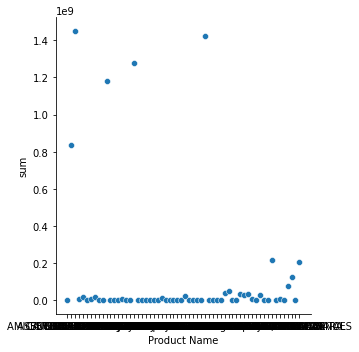

In [ ]:
#An aggregation of the security requirement per product offering
loan4=loans.groupby(loans['Product Name'])['Net Asset Value'].agg(['sum', 'mean', 'max'])
# loans.groupby(year('Product Name')).agg({'Amount Financed': 'sum'})
Fig= sns.relplot(data=loan4, x='Product Name', y="sum")
Fig.size=(12,10)
plt.show()

In [ ]:
# From here I can deduce that Business Loan 2, Project Finance, Asset 
#Finance and Institutional Loans are some of the most expensive loans to finance
loan4

,sum,mean,max
Product Name,,,
AMICA VISA CARD LOAN,0.000000e+00,0.000000e+00,0.000000e+00
ASSET FINANCE LOAN,8.358213e+08,3.942553e+06,4.512500e+08
BUSINESS LOAN 2,1.450942e+09,6.171593e+05,9.025000e+07
BUSINESS LOANS,5.962333e+06,1.743372e+04,2.200000e+06
CASH LOAN,1.682000e+07,7.845149e+03,6.500000e+06
COFFEE ADVANCE LOAN,6.494000e+05,2.546667e+03,1.390000e+05
COFFEE MTL LOAN,8.508450e+06,2.835205e+03,5.320000e+05
COFFEE STL LOAN,1.635012e+07,9.921188e+03,1.540000e+06
CROP ADVANCE lOAN,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
# missing data
((loans
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

Product ID              0.009636
Product Name            0.009636
Classification          0.009636
Amount Financed         0.004818
Term                    0.019272
Arrears Days            0.009636
Interest Rate           0.019272
Net Asset Value         0.009636
Interest Receivable     0.009636
Purpose Description    23.575042
Date Disbursed          0.057817
Last Credit Date        7.925801
Maturity Date           0.028909
dtype: float64

# Binning the Data: Feature selection and engineering
## Feature Selection
The target column is loan classification. The column has five unique variables, normal, watch, substandard, doubtful and loss. These are the criteria for which we will evaluate the volatility of a loan. Other features that will also be binned and used for further analysis include:

1. Amount financed - To undrestand the amounts upon which giving a loan becomes risky
2. Interest receivable- To understand whether the SACCO makes any substantial income from the loans and what is more profitable
3. Interest rate- To evaluate what the interest rates available and whether they factor into loan repayment
4. Net asset value- To see how much in collateral should actually be asked for.

#Credit Risk Calculation: Calculating Expected Loss.
𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑𝑙𝑜𝑠𝑠=𝑃𝑟𝑜𝑏𝑎𝑏𝑖li𝑡𝑦𝑜𝑓𝑑𝑒𝑓𝑎𝑢𝑙𝑡∗𝐿𝑜𝑠𝑠𝑔𝑖𝑣𝑒𝑛𝑑𝑒𝑓𝑎𝑢𝑙𝑡∗𝐸𝑥𝑝𝑜𝑠𝑢𝑟𝑒𝑎𝑡𝑑𝑒𝑓𝑎𝑢𝑙𝑡 
Deafult: 0, Non-default: 1 Many definitions of default: 90 days overdue payment, committed a fraud.

PD model: Logisitic regression (LR). Dependent variable (output variable) ranges between 0 (default) and 1 (non-default).

LR estimates the relationship between ln(odds) of outcome variable and a linear combination of independent variables. ln(odds) = ln(non-defaults / defaults)

In [ ]:
#Creating dummy variables
def dummy_creation(df, columns_list):
    loans_dummies = []
    for col in columns_list:
        loans_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    loans_dummies = pd.concat(loans_dummies, axis = 1)
    df_loans = pd.concat([loans, loans_dummies], axis = 1)
    return loans

In [ ]:
# apply to our final four categorical variables
loans_train = dummy_creation(loans, ['Product Name', 'Classification', 'Purpose Description'])


### WoE Feature Engineering and IV Calculation for our Data
We will define three functions as follows, each one to:
calculate and display Weights and IV values for categorical variables
The formula to calculate WoE is as follow: WOE=% of good/% of bad loans
IV is calculated as follows: (%good-%bad customers)*WoE

calculate and display Weights and IV values for numerical variables
plot the WoE values against the bins to help us in visualizing WoE and combining similar WoE bins

In [ ]:

def Weights_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
## Calculating the weights of the discreet variables


In [ ]:
def weights_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
## Calculating the weights of the continous variables

In [ ]:
# We set the default style of the graphs to the seaborn style. 
sns.set()
# function to plot WoE value
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [ ]:
ref_categories = ['Product Name', 'Classification', 'Amount Financed',
       'Term', 'Arrears Days', 'Interest Rate', 'Net Asset Value',
       'Interest Receivable', 'Date Disbursed',
       'Last Credit Date', 'Maturity Date']

In [ ]:
# custom transformer class to create new categorical dummy features
class WoE_Binning(BaseEstimator, TransformerMixin):
    def __init__(self, loans): # no *args or *kargs
        self.X = loans
    def fit(self, loans, y = None):
        return self

In [ ]:
# Creating bins
def transform(self, loans):
        X_new['Product Name: CASH LOAN'] = loans.loc[:,'Product Name: CASH LOAN']
        X_new['Product Name: BUSINESS LOAN 2'] = loans.loc[:,"Product Name: BUSINESS LOAN 2"]
        X_new['Product Name: BUSINESS LOAN'] = loans.loc[:,'Product Name:BUSINESS LOAN']
        X_new['Product Name: SALARY LOANS 2'] = loans.loc[:,"Product Name: SALARY LOANS 2"]
        X_new['Product Name: STAFF ASSET LOAN'] = loans.loc[:,'Product Name: STAFF ASSET LOAN']
        X_new['Product Name: ASSET FINANCE LOAN'] = loans.loc[:,"Product Name: ASSET FINANCE LOAN"]
        X_new['Product Name: COFFEE MTL LOAN'] = loans.loc[:,'Product Name: COFFEE MTL LOAN']
        X_new['Product Name: DEVELOPMENT LOAN 2'] = loans.loc[:,'Product Name: DEVELOPMENT LOAN 2']
        X_new['Product Name: Float Finance Loan'] = loans.loc[:,"Product Name: Float Finance Loan"]
        X_new['Product Name: INSTITUTIONAL LOANS 2'] = loans.loc[:,'Product Name: INSTITUTIONAL LOANS 2']
        X_new['Product Name: MILK LOAN'] = loans.loc[:,"Product Name: MILK LOAN"]
        X_new['Product Name: Milk Special Working Capital'] = loans.loc[:,'Product Name: Milk Special Working Capital']
        X_new['Product Name: MINI MILK ADVANCE'] = loans.loc[:,"Product Name: MINI MILK ADVANCE"]
        X_new['Product Name: LOAN ON FIXED DEPOSIT 2'] = loans.loc[:,'Product Name: LOAN ON FIXED DEPOSIT 2']
        X_new['Product Name: PROJECT FINANCE LOAN'] = loans.loc[:,'Product Name: PROJECT FINANCE LOAN']
        X_new['Product Name: SALARY PLUS LOAN'] = loans.loc[:,"Product Name: SALARY PLUS LOAN"]
        X_new['Product Name: SOCIETY CROP ADVANCE'] = loans.loc[:,'Product Name:SOCIETY CROP ADVANCE']
        X_new['Product Name: SPECIAL STOCK BOOSTA LOAN'] = loans.loc[:,"Product Name: SPECIAL STOCK BOOSTA LOAN"]
        X_new['Product Name: SPECIAL DEVELOPMENT'] = loans.loc[:,'Product Name: SPECIAL DEVELOPMENT']
        X_new['Product Name: STAFF CAR LOAN'] = loans.loc[:,"Product Name: STAFF CAR LOAN"]
        X_new['Product Name: STAFF LOAN'] = loans.loc[:,'Product Name: STAFF LOAN']
        X_new['Product Name: SPECIAL STOCK BOOSTA LOAN'] = loans.loc[:,'Product Name: SPECIAL STOCK BOOSTA LOAN']
        X_new['Product Name: TEA ADVANCE'] = loans.loc[:,"Product Name: TEA ADVANCE"]
        X_new['Product Name: TEA ADVANCE 2'] = loans.loc[:,'Product Name: TEA ADVANCE 2']
        X_new['Product Name: TEA LOAN'] = loans.loc[:,"Product Name: TEA LOAN"]
        X_new['Product Name: TEA LOAN 2'] = loans.loc[:,"Product Name: TEA LOAN 2"]
        X_new['Product Name: TENDER/LPO ADVANCES '] = loans.loc[:,'Product Name: TENDER/LPO ADVANCES']
        X_new['Product Name: WORKING CAPITAL'] = loans.loc[:,'Product Name:WORKING CAPITAL']
        X_new['Product Name: OTHER'] = sum([loans['Product Name: DEVELOPMENT LOAN'], loans['Product Name: AMICA VISA CARD LOAN'], loans['Product Name: INSTITUTIONAL LOANS'], loans['Product Name: CROP ADVANCE lOAN'], loans['Product Name: EZESHA LOAN'], loans['Product Name:VIJANAA BIASHARA'], loans['Product Name: PAPO HAPO ADVANCE'], loans['Product Name: SCHOOL FEES LOAN'], loans['Product Name: MICRO FINANCE LOAN 2'],loans['Product Name: FARM FINANCE LOAN'], loans['Product Name: MAMBA TANK'], loans['Product Name:MILK LOAN'],loans['Product Name: STAFF SCHOLAR LOAN'], loans['Product Name: STAFF SALARY ADVANCE'], loans['Product Name: MICRO FINANCE LOAN 2']
        ,loans['Product Name: FARM INPUT LOAN'], loans['Product Name: PREMIUM FINANCING LOAN'], loans['Product Name:Rent Consumer Loan'],loans['Product Name: JEKI LOAN 2'], loans['Product Name: JEKI LOAN'], loans['Product Name: LOAN ON FIXED DEPOSIT'], loans['Product Name: GROUP LOAN'], loans['Product Name: SALARY PLUS LOAN'], loans['Product Name:STAFF EMERGENCY']])
        N_new = pd.concat([X_new, loans.loc[:, 'Classification:Substandard': 'Classification:Doubtful':'Classification:Loss']], axis = 1)
        Y_new= pd.concat([X_new, loans.loc[:,"Classification:Watch":'Classification:Normal']], axis = 1)
        X_new= pd.concat(loans.loc[:,Y_new, N_new], axis = 1)
        X_new['Term:<60'] = np.where((loans['Term'] >= 0), 1, 0)
        X_new['Term:>60'] = np.where((loans['Term'] >= 60), 1, 0)
        X_new['Interest Rate:<15'] = np.where((loans['Interest Rate'] <= 15), 1, 0)
        X_new['Interest Rate:15-20'] = np.where((loans['Interest Rate'] > 15) & (loans['Interest Rate'] <= 20), 1, 0)
        X_new['Interest Rate:20-30'] = np.where((loans['Interest Rate'] > 20) & (loans['Interest Rate'] <= 30), 1, 0)
        X_new['Interest Rate:30-60'] = np.where((loans['Interest Rate'] > 30) & (loans['Interest Rate'] <= 61), 1, 0)
        X_new['Interest Receivable:missing'] = np.where(loans['annual_inc'].isnull(), 1, 0)
        X_new['Interest Receivable:<28,555'] = np.where((loans['annual_inc'] <= 28555), 1, 0)
        X_new['Interest Receivable:28,555-37,440'] = np.where((loans['Interest Receivable'] > 28555) & (loans['Interest Receivable'] <= 37440), 1, 0)
        X_new['Interest Receivable:37,440-61,137'] = np.where((loans['Interest Receivable'] > 37440) & (loans['Interest Receivable'] <= 61137), 1, 0)
        X_new['Interest Receivable:61,137-81,872'] = np.where((loanas['Interest Receivable'] > 61137) & (loans['Interest Receivable'] <= 81872), 1, 0)
        X_new['Amount Financed:<100,000'] = np.where((loans['Amount Financed'] <= 100000), 1, 0)
        X_new['Amount Financed:100,000-500,000'] = np.where((loans['Amount Financed'] > 100000)      & (loans['Amount Financed'] <= 500000), 1, 0)
        X_new['Amount Financed:500,000-1,000,000'] = np.where((loans['Amount Financed'] > 500000)    & (loans['Amount Financed'] <= 1000000), 1, 0)
        X_new['Amount Financed:1,000,000-1,500,000'] = np.where((loans['Amount Financed'] > 1000000) & (loans['Amount Financed'] <= 1500000), 1, 0)
        X_new['Amount Financed:1,500,000-2,000,000'] = np.where((loans['Amount Financed'] > 1500000) & (loans['Amount Financed'] <= 2000000), 1, 0)
        X_new['Amount Financed:2,000,000-2,500,000'] = np.where((loans['Amount Financed'] > 2000000) & (loans['Amount Financed'] <= 2500000), 1, 0)
        X_new['Amount Financed:2,500,000-3,000,000'] = np.where((loans['Amount Financed'] > 2500000) & (loans['Amount Financed'] <= 3000000), 1, 0)
        X_new['Amount Financed:3,000,000-3,500,000'] = np.where((loans['Amount Financed'] > 3000000) & (loans['Amount Financed'] <= 3500000), 1, 0)
        X_new['Amount Financed:3,500,000-4,000,000'] = np.where((loans['Amount Financed'] > 3500000) & (loans['Amount Financed'] <= 4000000), 1, 0)
        X_new['Amount Financed:4,000,000-4,500,000'] = np.where((loans['Amount Financed'] > 4000000) & (loans['Amount Financed'] <= 4500000), 1, 0)
        X_new['Amount Financed:4,500,000-5,000,000'] = np.where((loans['Amount Financed'] > 4500000) & (loans['Amount Financed'] <= 5000000), 1, 0)
        X_new['Amount Financed:5,000,000-5,500,000'] = np.where((loans['Amount Financed'] > 5000000) & (loans['Amount Financed'] <= 5500000), 1, 0)
        X_new['Amount Financed:5,500,000-6,000,000'] = np.where((loans['Amount Financed'] > 5500000) & (loans['Amount Financed'] <= 6000000), 1, 0)
        X_new['Amount Financed:6,000,000-6,500,000'] = np.where((loans['Amount Financed'] > 6000000) & (loans['Amount Financed'] <= 6500000), 1, 0)
        X_new['Amount Financed:>6,500,000'] = np.where((loans['Amount Financed'] > 6500000), 1, 0)
        X_new.drop(columns = ref_categories, inplace = True)
        return X_new


# Creating the Model

In [ ]:
# define modeling pipeline
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
woe_transform = WoE_Binning(loans)
pipeline = Pipeline(steps=[('woe', woe_transform), ('model', reg)])

# define cross-validation criteria
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, loans_train, loans_train, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

# fit the pipeline on the whole training set
pipeline.fit(loans_train, loans_train)

# create a summary table
# first create a transformed training set through our WoE_Binning custom class
loanns_train_woe_transformed = woe_transform.fit_transform(loans_train)
# Store the column names in loans_train as a list
feature_name = loans_train_woe_transformed.columns.values
# Create a summary table of our logistic regression model
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients'
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)

AttributeError: ignored

# Conclusion
There are a large number of factors that still require consideration so that I can create a model fit to predict future incomes and a model to enable the sacco to get the ultimate product criteria. \
This has created a need to learn such algorithms as decision tree algorithm and regression analysis. However, due some underlying factors they were not applied in this project but once more factors are obtained they will be implemented. 